<a href="https://colab.research.google.com/github/pr4sad/Machine-Learning/blob/main/Mini%20Project/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the data and libraries**

In [8]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

while any(marker in os.getcwd() for marker in ['workspace_dimred']):
    os.chdir("..")

sys.path.append('classes_and_functions_dimred')

current_directory = os.getcwd()
current_directory

'/content'

In [9]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00


In [12]:
# Importing external packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
import statsmodels.api as sm
import umap.umap_ as umap
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from statsmodels.formula.api import ols
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

from custom_functions_classes_dimred import (
    unique_column_content_check,
    corr_matrix_dataframe,
    make_mi_scores,
    plot_mi_scores,
    calculate_skewness,
    DropColumnTransformer,
    CustomOutlierRemoverInterquartile,
    CustomMinMaxScaler,
    plot_indices_relation,
    plot_violin_features,
    plot_violin_with_binary_hue,
    plot_histograms_nonbinary,
    plot_histograms_nonbinary_logarithmic,
    plot_pairplots_kde_hue,
    plot_class_distribution,
    plot_algo3d,
    plot_explained_variance,
    show_pca_weights,
    lda_transform_plot,
)


In [13]:
raw_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
raw_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **EXPLORATORY DATA ANALYSIS**

### **Data Cleaning and Formatting**

In [14]:
raw_data.shape

(299, 13)

In [15]:
raw_data.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [16]:
raw_data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


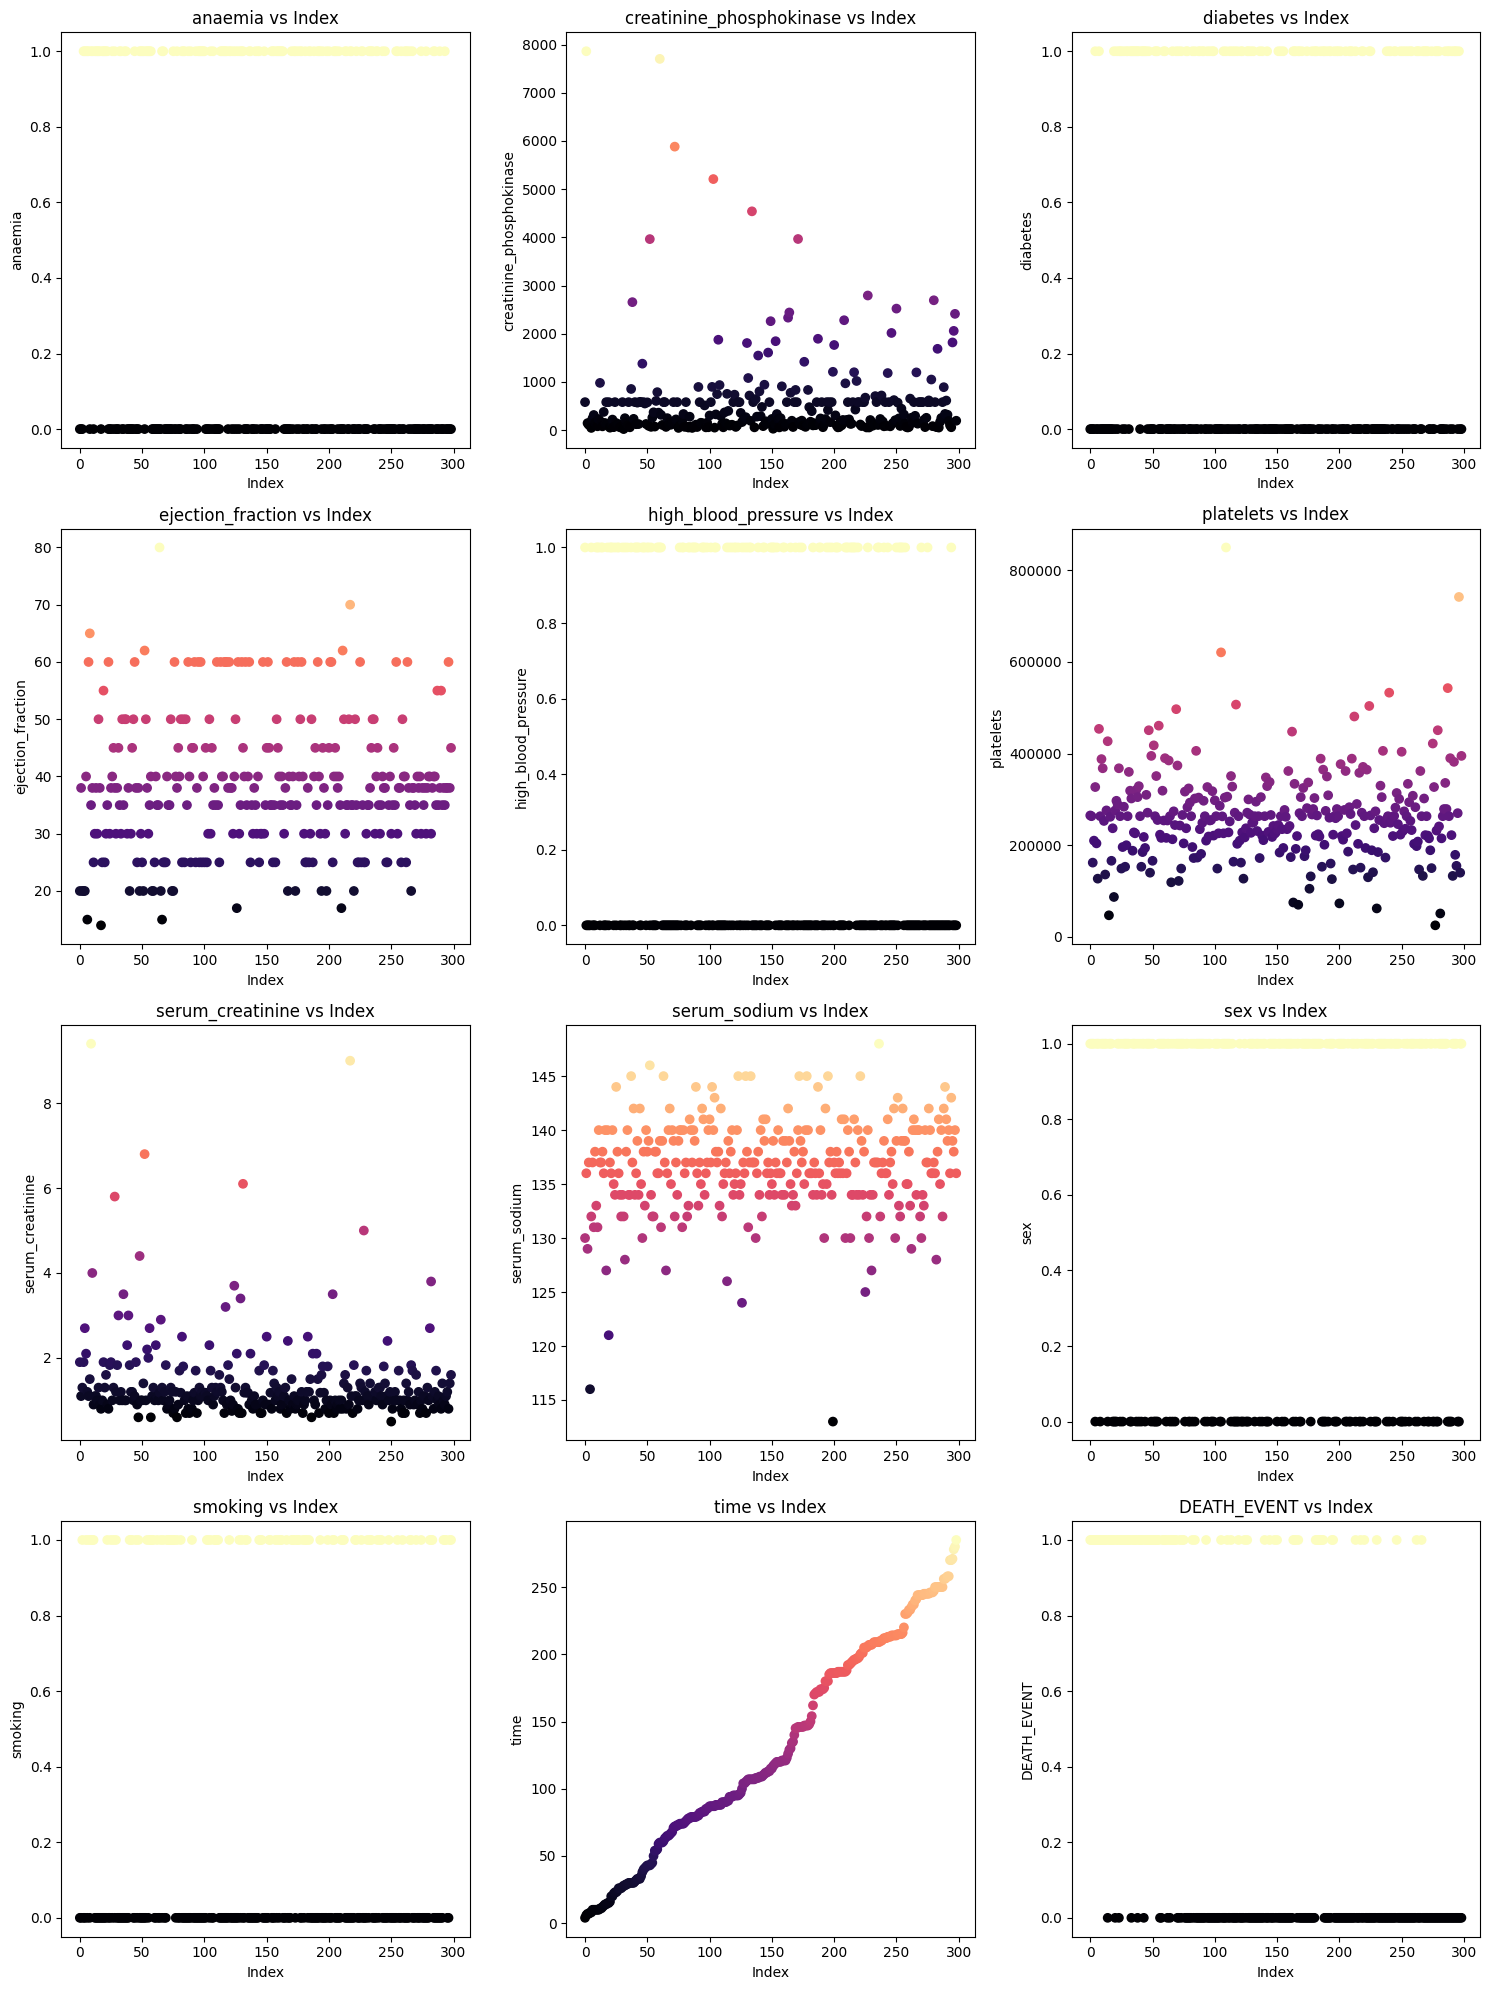

In [17]:
# Call the function with multiple indices
plot_indices_relation(raw_data, [1,2,3,4,5,6,7,8,9,10,11,12])

In [18]:
print("\nSummary statistics for numerical variables:")
raw_data.describe()


Summary statistics for numerical variables:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [19]:
calculate_skewness(raw_data)

,Skewness,Skewness Label
age,0.423062,Not Skewed
anaemia,0.278261,Not Skewed
creatinine_phosphokinase,4.463110,Right Skewed
diabetes,0.333929,Not Skewed
ejection_fraction,0.555383,Right Skewed
high_blood_pressure,0.626732,Right Skewed
platelets,1.462321,Right Skewed
serum_creatinine,4.455996,Right Skewed
serum_sodium,-1.048136,Left Skewed
sex,-0.626732,Left Skewed


In [23]:
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
raw_data_nonbinary = raw_data.drop(binary_columns, axis=1)

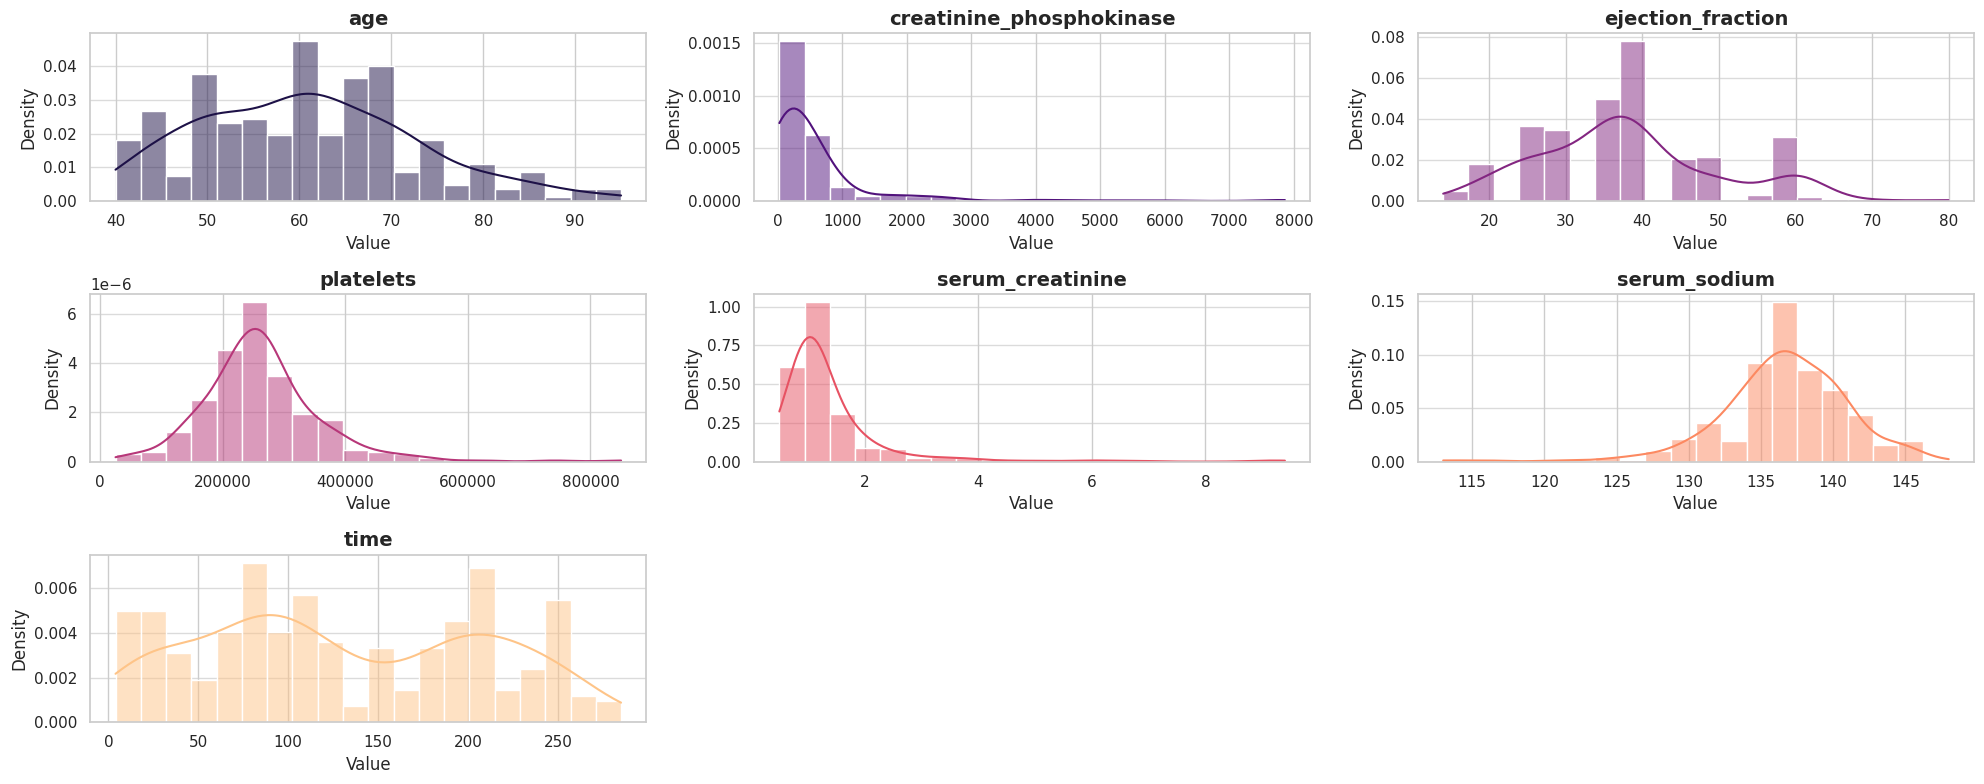

In [24]:
plot_histograms_nonbinary(raw_data_nonbinary, (20, 8))

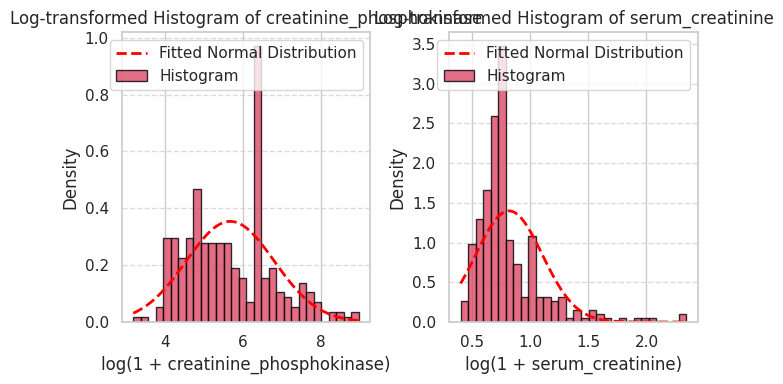

In [25]:
plot_histograms_nonbinary_logarithmic(raw_data_nonbinary, ['creatinine_phosphokinase', 'serum_creatinine'], (10, 4))

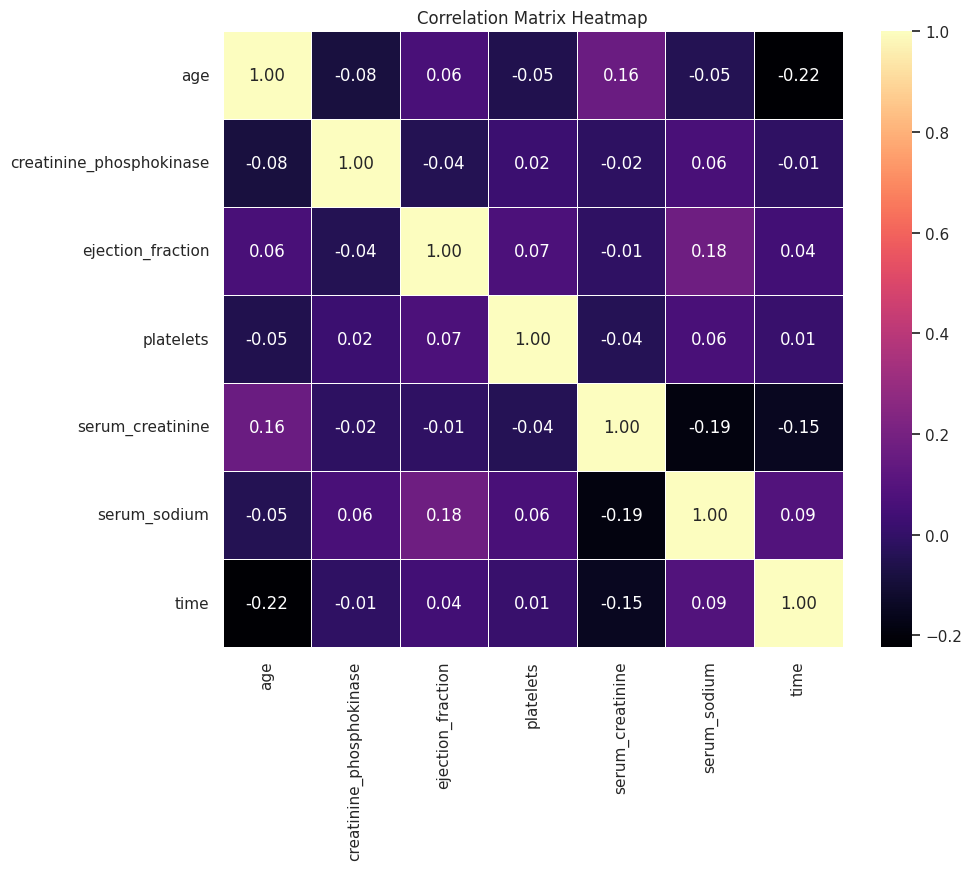

In [26]:
correlation_matrix = raw_data_nonbinary.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidth=.5, fmt='.2f', cmap='magma')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:
corr_matrix_dataframe(raw_data_nonbinary)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.00,-0.08,0.06,-0.05,0.16,-0.05,-0.22
creatinine_phosphokinase,-0.08,1.00,-0.04,0.02,-0.02,0.06,-0.01
ejection_fraction,0.06,-0.04,1.00,0.07,-0.01,0.18,0.04
platelets,-0.05,0.02,0.07,1.00,-0.04,0.06,0.01
serum_creatinine,0.16,-0.02,-0.01,-0.04,1.00,-0.19,-0.15
serum_sodium,-0.05,0.06,0.18,0.06,-0.19,1.00,0.09
time,-0.22,-0.01,0.04,0.01,-0.15,0.09,1.00


## **Class label distribution**

This dataset is **imbalanced** with almost  
2x samples labeled 0


Class=0, n=203 (67.893%)
Class=1, n=96 (32.107%)


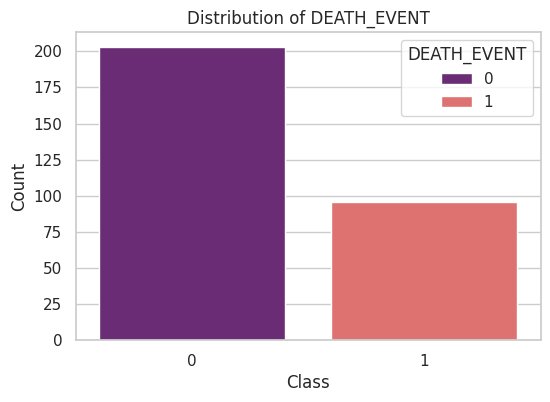

In [31]:
plot_class_distribution(raw_data['DEATH_EVENT'], 'DEATH_EVENT')

## **Data Cleaning**

In [32]:
raw_data['age'] = raw_data['age'].round().astype('int64')
raw_data['platelets'] = raw_data['platelets'].round().astype('int64')

In [33]:
raw_data.dtypes

,0
age,int64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,int64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [48]:
data_cleaning = make_pipeline(
    FunctionTransformer(lambda X: X.drop_duplicates(), validate=False),
    CustomOutlierRemoverInterquartile(factor=2.5),
)
df_cleaned = data_cleaning.fit_transform(raw_data)
df_cleaned.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,90,1,47,0,40,1,204000,2.1,132,1,1,8,1
6,75,1,246,0,15,0,127000,1.2,137,1,0,10,1


In [49]:
df_cleaned.shape

(251, 13)

In [50]:
print("\nSummary statistics:")
df_cleaned.describe()


Summary statistics:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,60.980080,0.446215,357.290837,0.418327,38.254980,0.370518,257516.406375,1.179721,136.741036,0.641434,0.314741,130.844622,0.302789
std,11.879546,0.498092,318.577098,0.494270,11.981599,0.483908,80011.538715,0.399340,4.011068,0.480538,0.465341,76.569993,0.460383
min,40.000000,0.000000,30.000000,0.000000,14.000000,0.000000,25100.000000,0.600000,121.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,224.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,117.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,299000.000000,1.300000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,1688.000000,1.000000,80.000000,1.000000,504000.000000,2.500000,148.000000,1.000000,1.000000,285.000000,1.000000


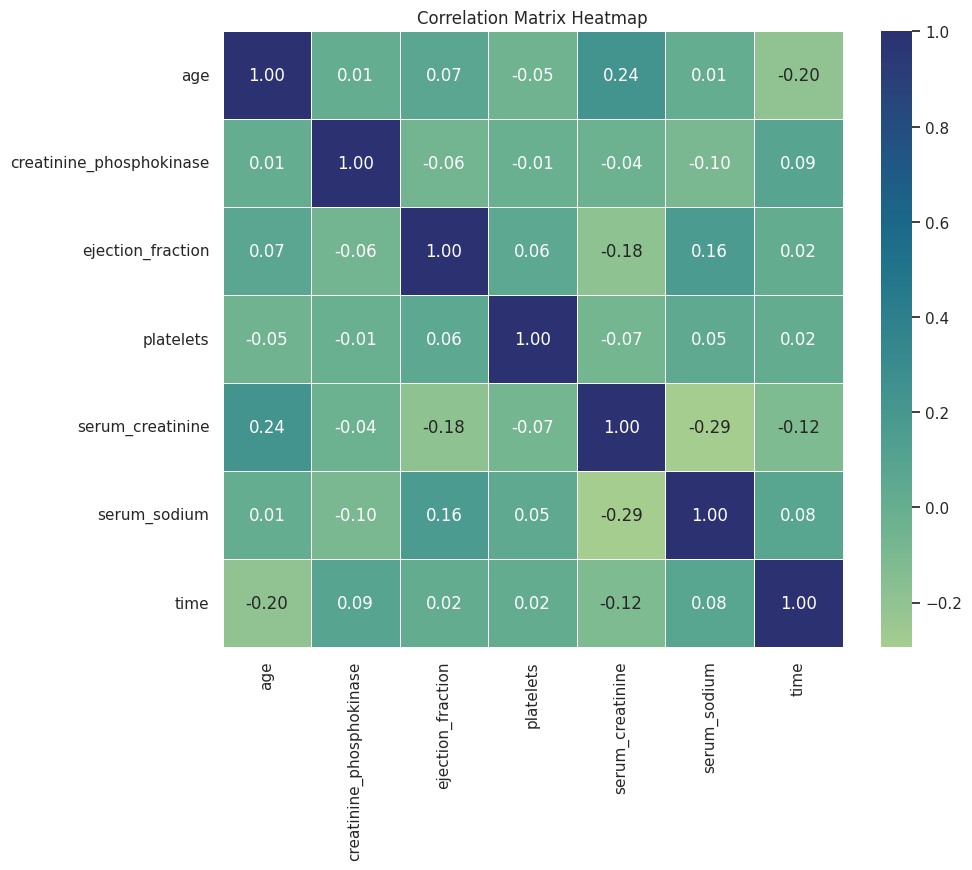

In [51]:
warnings.filterwarnings(action='ignore')
df_cleaned_nonbinary = df_cleaned.drop(binary_columns, axis=1)
correlation_matrix = df_cleaned_nonbinary.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidth=.5, fmt='.2f', cmap='crest')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [52]:
corr_matrix_dataframe(df_cleaned_nonbinary)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.00,0.01,0.07,-0.05,0.24,0.01,-0.20
creatinine_phosphokinase,0.01,1.00,-0.06,-0.01,-0.04,-0.10,0.09
ejection_fraction,0.07,-0.06,1.00,0.06,-0.18,0.16,0.02
platelets,-0.05,-0.01,0.06,1.00,-0.07,0.05,0.02
serum_creatinine,0.24,-0.04,-0.18,-0.07,1.00,-0.29,-0.12
serum_sodium,0.01,-0.10,0.16,0.05,-0.29,1.00,0.08
time,-0.20,0.09,0.02,0.02,-0.12,0.08,1.00


### **Data Preprocessing**

In [56]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Assuming your CustomMinMaxScaler and DropColumnTransformer classes are defined
# in a separate file (e.g., custom_functions_classes_dimred.py)
from custom_functions_classes_dimred import CustomMinMaxScaler, DropColumnTransformer

# ... (your existing code) ...

# Modify the preprocessing pipeline to handle all columns correctly
preprocessing_pipeline = make_pipeline(
    CustomMinMaxScaler(columns=['age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine', 'time']),
    # Instead of dropping columns, select the columns to keep
    ColumnSelector(columns=['age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine', 'time', 'DEATH_EVENT']),
)



# Fit and transform using the modified pipeline
df_preprocessed_with_target = preprocessing_pipeline.fit_transform(df_cleaned)
df_preprocessed_with_target

NameError: name 'ColumnSelector' is not defined